<a href="https://colab.research.google.com/github/Voztok94/Homework7/blob/main/HW7_16.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

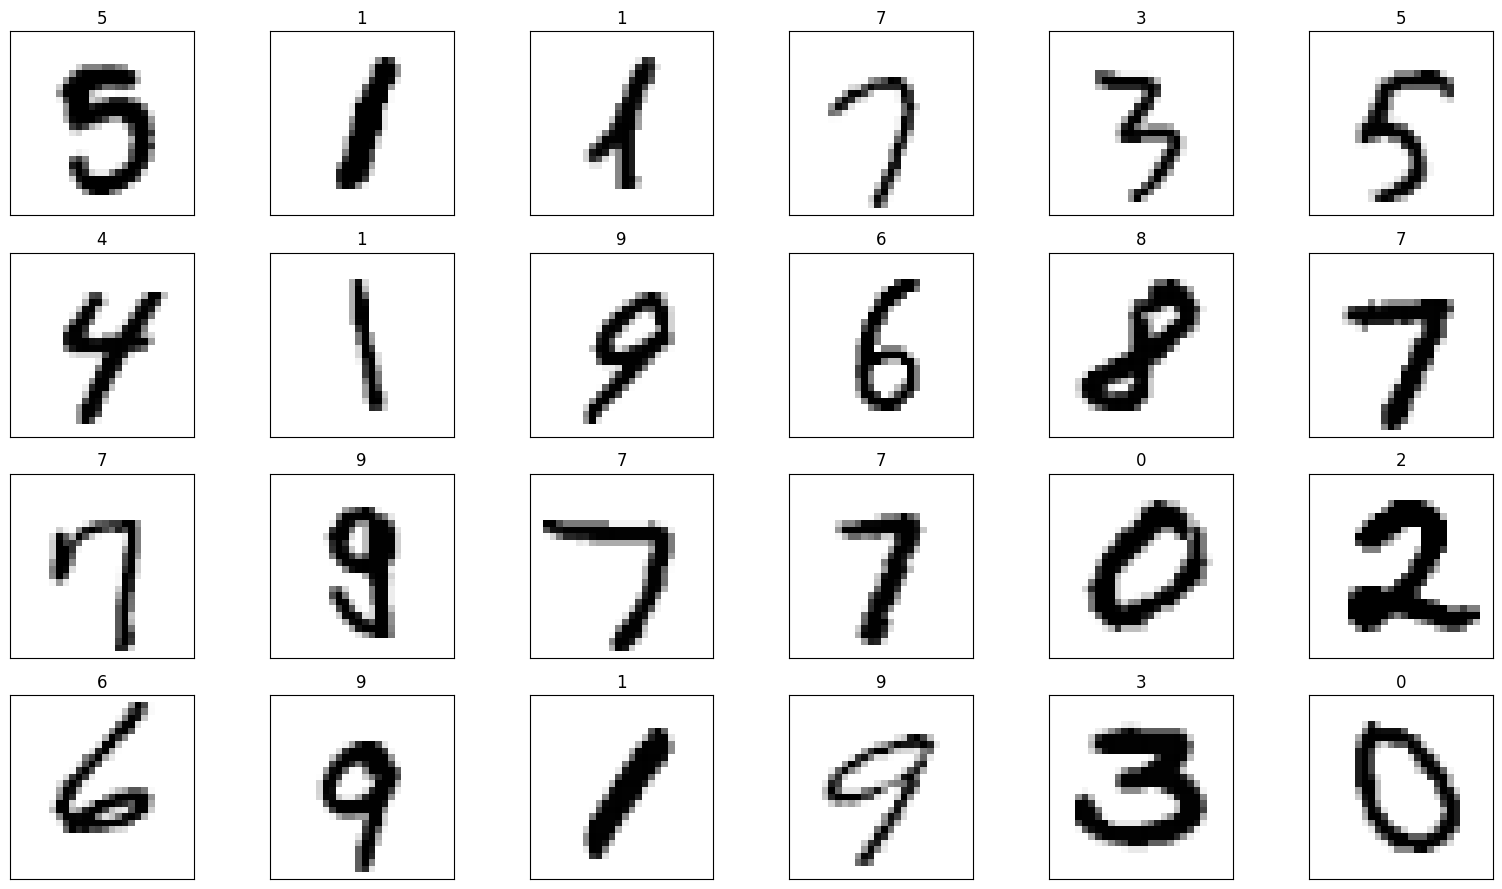

In [4]:
# Visualization
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [5]:
#Reshaping and normalization
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from tensorflow.keras.utils import to_categorical, plot_model
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [7]:
y_train[0]  # one sample’s categorical data

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [19]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the results
cnn.add(Flatten())

cnn.add(Dense(units=4096, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,226,762 (50.46 MB)

 Trainable params: 13,226,762 (50.46 MB)

 Non-trainable params: 0 (0.00 B)

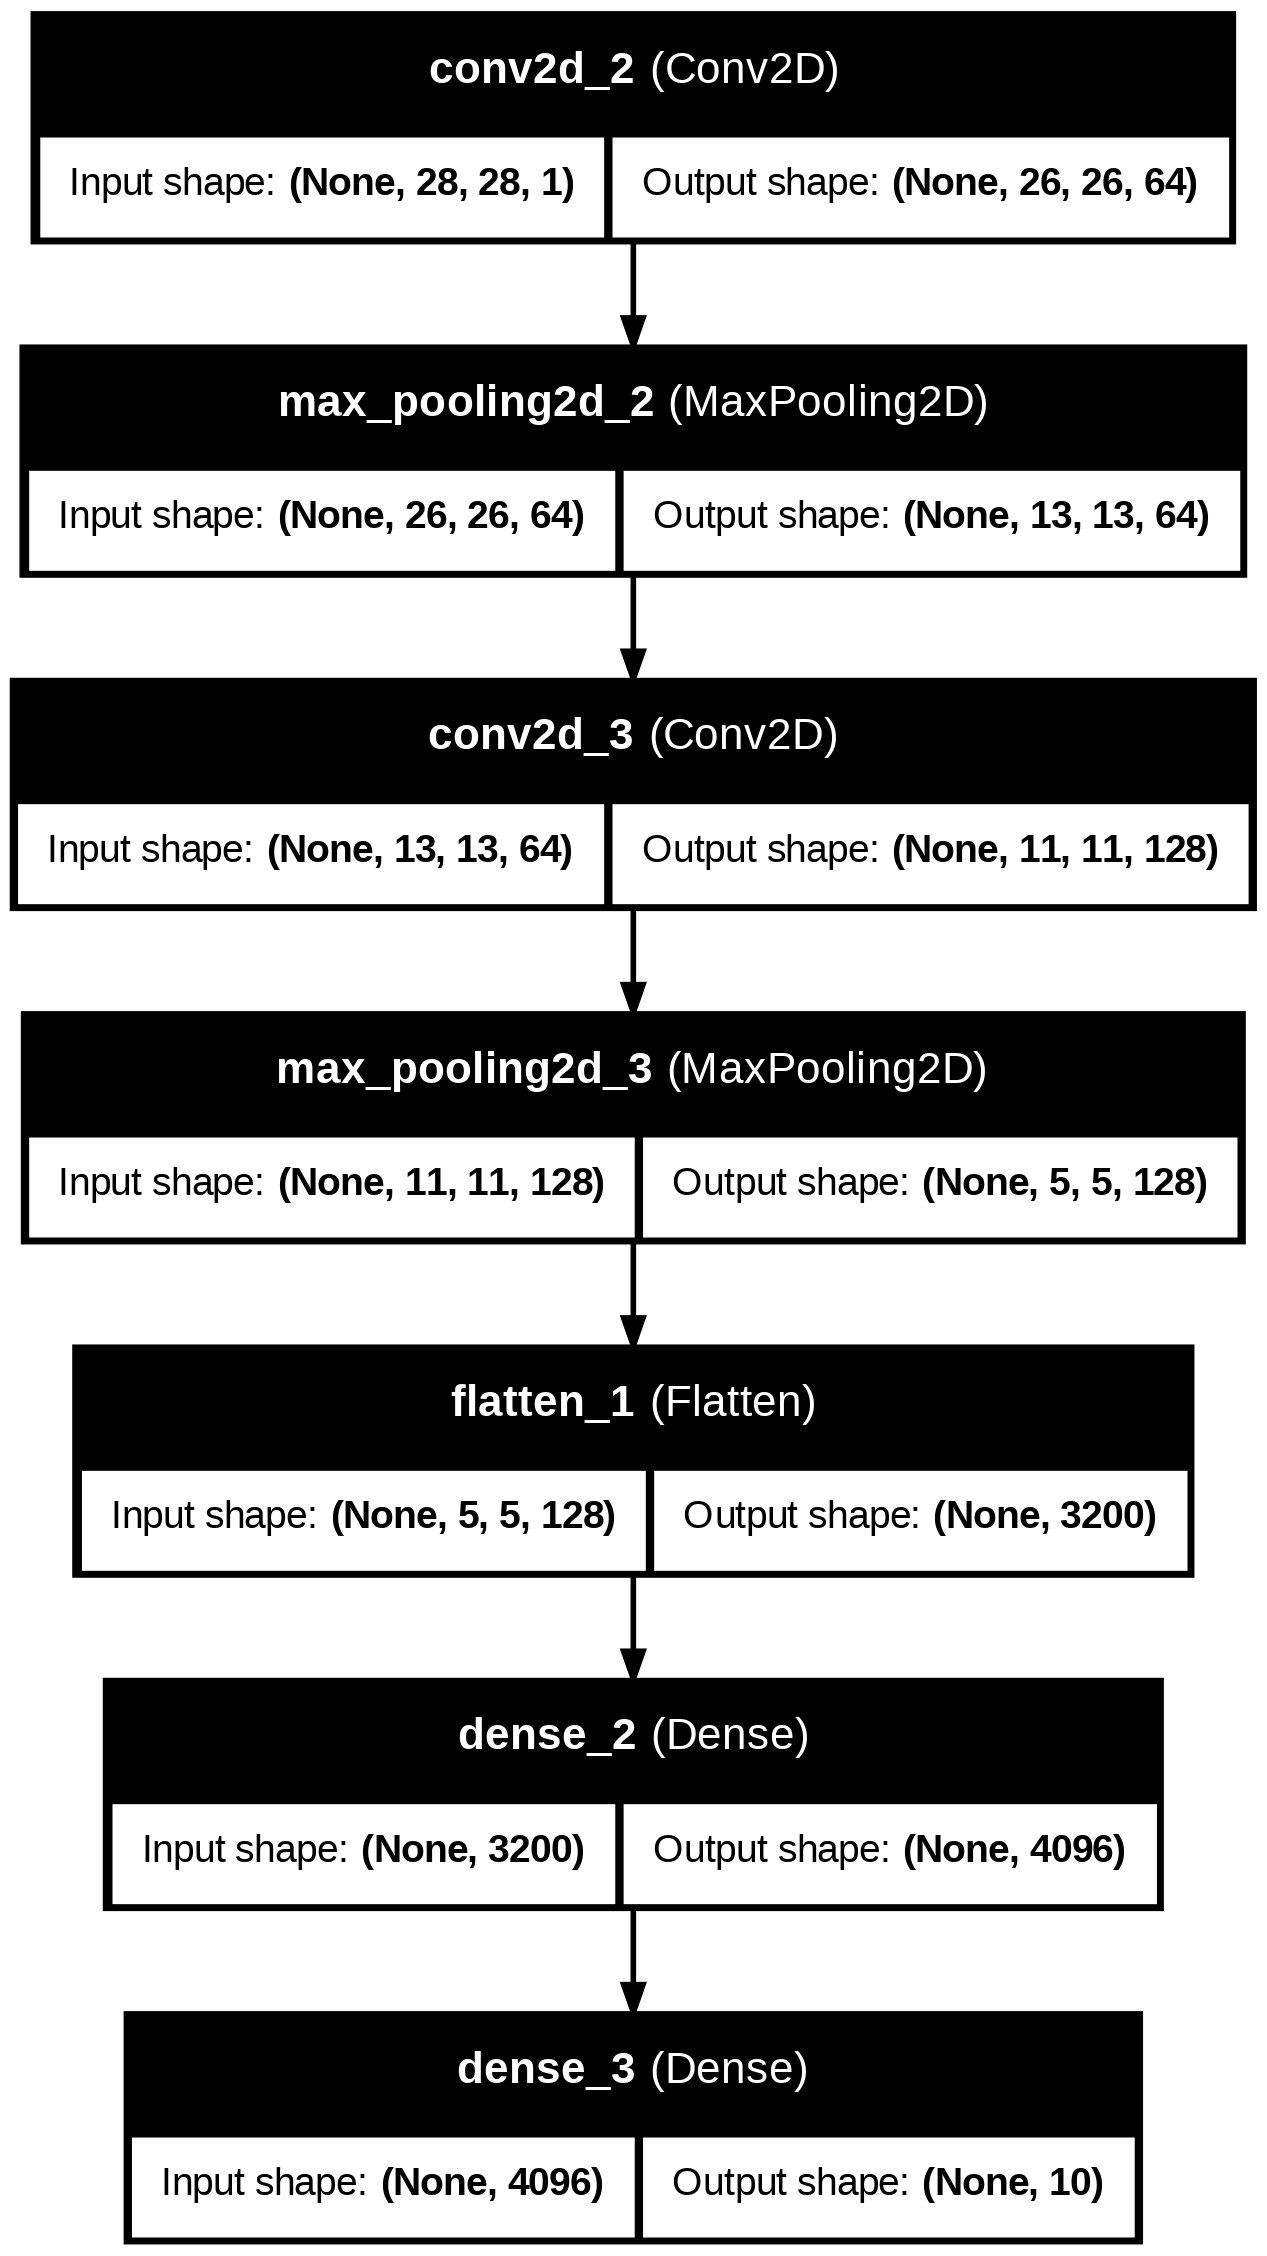

In [20]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')  # display resulting image in notebook

In [21]:
# Compiling the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluating the model
loss, accuracy = cnn.evaluate(X_test, y_test)
predictions = cnn.predict(X_test)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 363s 428ms/step - accuracy: 0.9235 - loss: 0.2437 - val_accuracy: 0.9833 - val_loss: 0.0563
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 380s 426ms/step - accuracy: 0.9888 - loss: 0.0344 - val_accuracy: 0.9888 - val_loss: 0.0430
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 361s 428ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9880 - val_loss: 0.0437
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 362s 429ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9890 - val_loss: 0.0409
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 380s 427ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9917 - val_loss: 0.0339
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9880 - loss: 0.0455
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step


In [22]:
loss, accuracy

(0.0348256416618824, 0.9907000064849854)

In [12]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000395%
1: 0.0000000009%
2: 0.0000008611%
3: 0.0000030666%
4: 0.0000000004%
5: 0.0000000245%
6: 0.0000000000%
7: 99.9999701977%
8: 0.0000001440%
9: 0.0000199990%


In [13]:
# Display incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)  # number of incorrect predictions

90

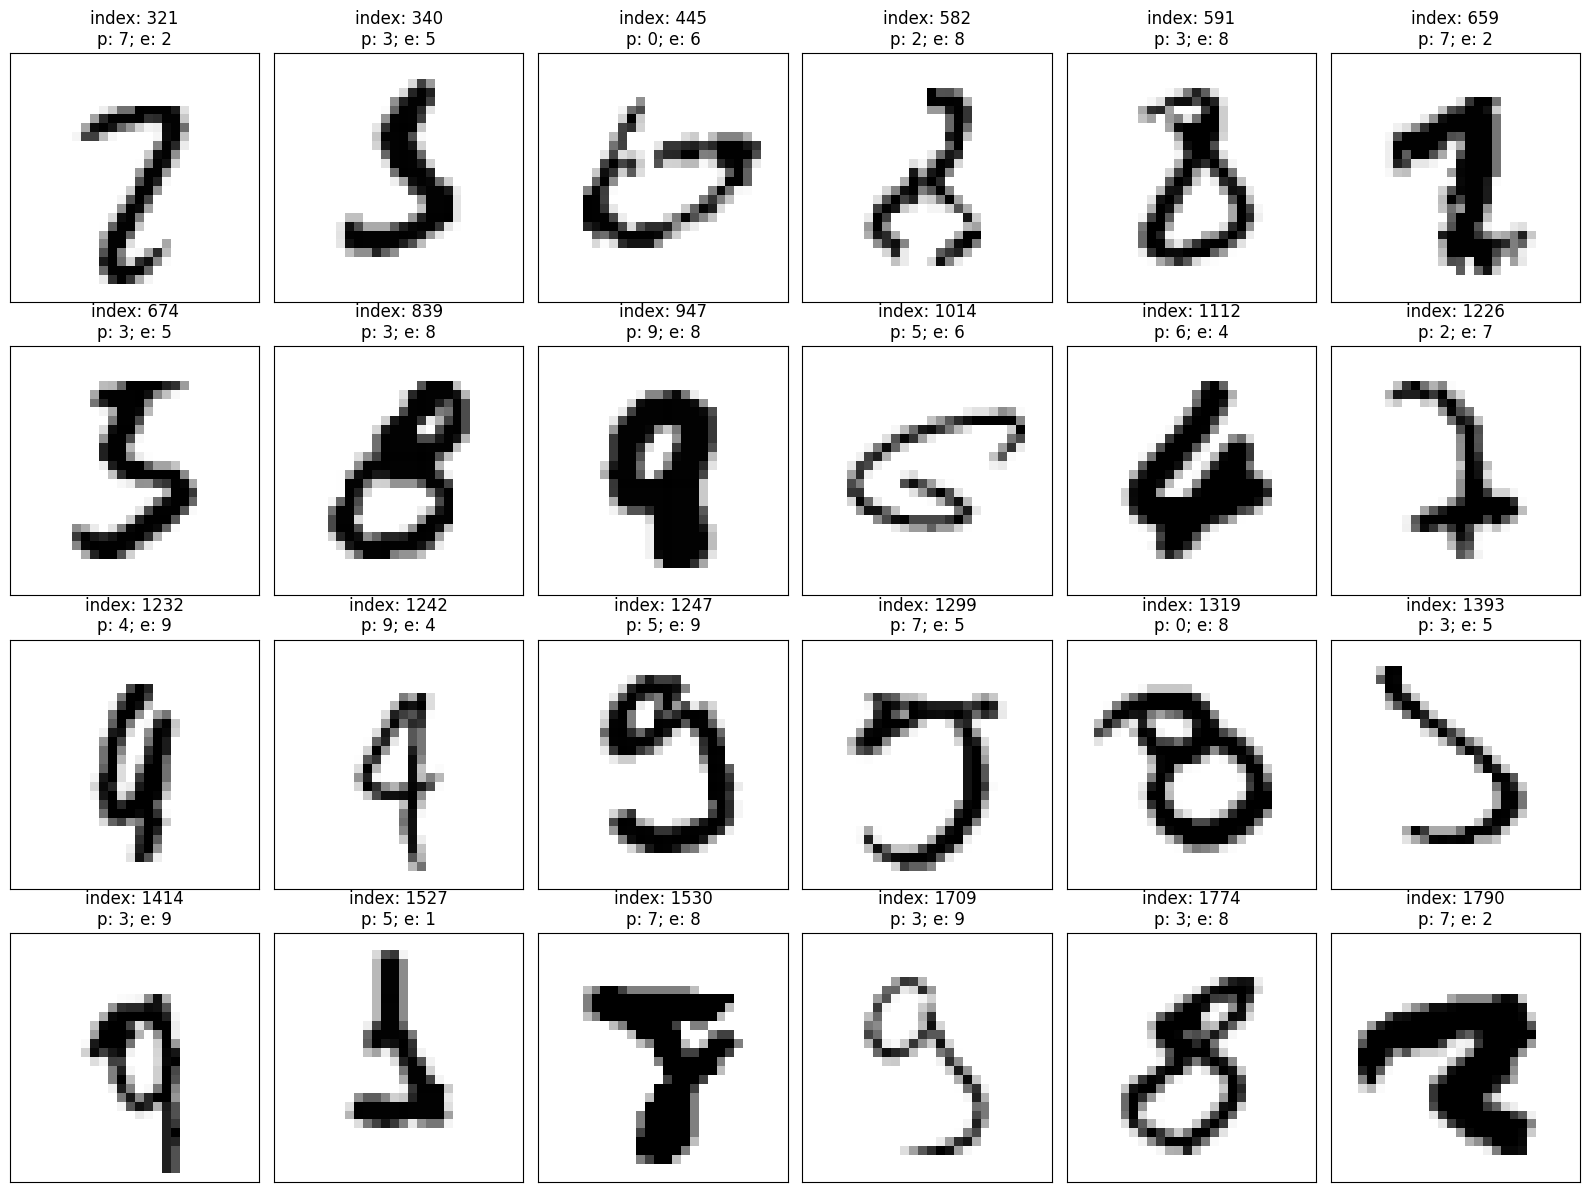

In [14]:
# Plot incorrect predictions
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [18]:
# Function to display probabilities
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

display_probabilities(predictions[340])
display_probabilities(predictions[740])
display_probabilities(predictions[1260])

cnn.save('mnist_cnn.h5.keras')

0: 0.0002370526%
1: 0.0013608053%
2: 0.0000137522%
3: 93.3625876904%
4: 0.0003812258%
5: 6.6248737276%
6: 0.0013057365%
7: 0.0000256820%
8: 0.0077493212%
9: 0.0014699844%
0: 0.0002555678%
1: 0.0054085522%
2: 0.0283486530%
3: 0.0065645385%
4: 61.6275727749%
5: 0.0009367380%
6: 0.0000000082%
7: 5.0550125539%
8: 0.0008425060%
9: 33.2750678062%
0: 0.0181742158%
1: 27.3393809795%
2: 0.1035256195%
3: 0.0044380489%
4: 0.0000653987%
5: 0.0005172639%
6: 0.0000005678%
7: 72.3239719868%
8: 0.1457333565%
9: 0.0641844410%
